# Pymaceuticals Inc.
---

### Analysis
This analysis provides insights into how different drug regimens impact tumor growth, and the potential influence of biological factors like weight on tumor volume:

We calculated a variety of summary statistics (mean, median, variance, standard deviation, and standard error of the mean) for the tumor volume across four key drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

Key Findings:

-Capomulin and Ramicane both have lower average tumor volumes and standard deviations compared to Infubinol and Ceftamin, suggesting better tumor reduction.
-Infubinol had a single potential outlier in tumor volume (36.32 mm³), indicating an unusual observation for one mouse.
-There is a strong positive correlation (correlation coefficient: 0.84) between mouse weight and tumor volume for the Capomulin regimen. Heavier mice tend to have larger tumors, even under treatment.

A box plot was generated for each drug regimen, showing the distribution of tumor volumes across mice. The box plot for Capomulin and Ramicane displayed smaller ranges of tumor volumes, indicating these regimens were more consistent in reducing tumor size compared to Infubinol and Ceftamin.

A line plot was created to visualize the tumor volume progression over time for a single mouse treated with Capomulin. This plot clearly shows a reduction in tumor size, illustrating the effectiveness of the treatment over the study period.

We explored the relationship between mouse weight and average tumor volume for the Capomulin regimen. A scatter plot was generated, showing a strong positive correlation between mouse weight and tumor size

The high correlation suggests that heavier mice tend to have larger tumors on average, even under the Capomulin treatment.

Conclusion
-Capomulin and Ramicane appear to be more effective at reducing tumor size compared to Infubinol and Ceftamin, with lower average tumor volumes and fewer variations in outcomes.
-There is a strong correlation between mouse weight and tumor volume for mice treated with Capomulin, suggesting that weight may influence tumor growth or the effectiveness of the treatment.
-Further studies could explore why heavier mice tend to have larger tumors, and whether this affects treatment outcomes.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
mice_number = combined_data['Mouse ID'].nunique()
mice_number

249

In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Checking for duplicate rows where Mouse ID and Timepoint are the same
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Dropping the rows for the duplicate Mouse ID 'g989'
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Calculating summary statistics for each drug regimen
regimen_group = clean_data.groupby('Drug Regimen')

# Summary statistics
tumor_volume_summary = pd.DataFrame({
    'Mean Tumor Volume': regimen_group['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': regimen_group['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': regimen_group['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': regimen_group['Tumor Volume (mm3)'].std(),
    'Tumor Volume SEM': regimen_group['Tumor Volume (mm3)'].sem()
})
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary_agg = clean_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)
tumor_volume_summary_agg.head()

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

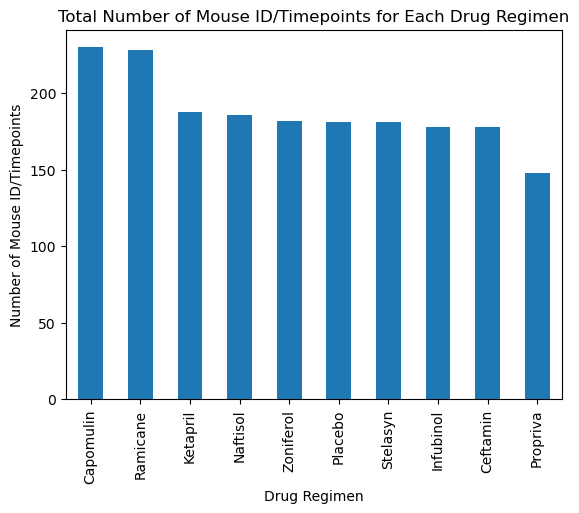

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

# Plotting the bar chart
chart = total_rows_per_regimen.plot(kind='bar', title="Total Number of Mouse ID/Timepoints for Each Drug Regimen")
chart.set_xlabel("Drug Regimen")
chart.set_ylabel("Number of Mouse ID/Timepoints")

# Display the plot
plt.show()

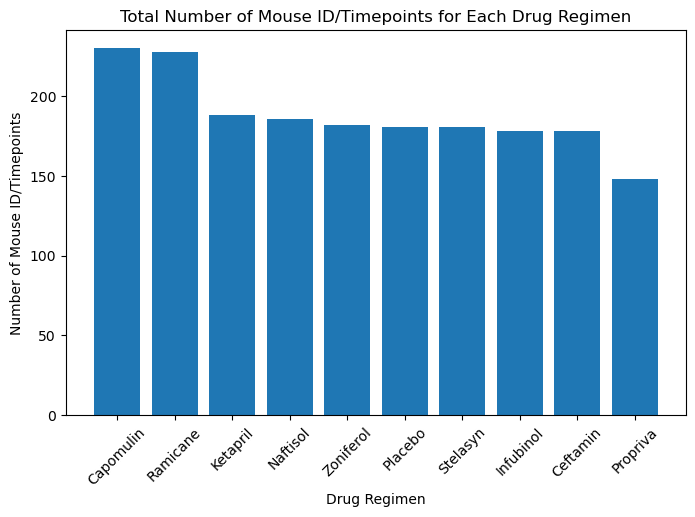

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data for plotting
total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

# Creating the plot
plt.figure(figsize=(8,5))
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen.values)
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.show()

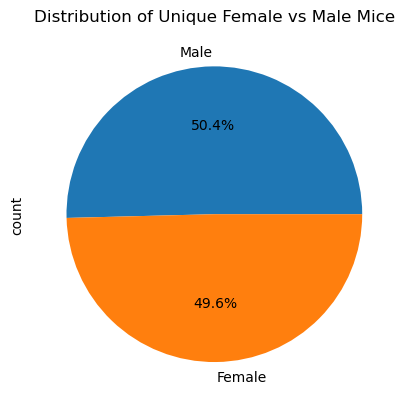

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Make the pie chart
# Getting the unique mice with their gender
unique_mice_gender = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Counting the distribution of male versus female mice
gender_distribution = unique_mice_gender['Sex'].value_counts()

# Generating a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Unique Female vs Male Mice')

# Display the plot
plt.show()

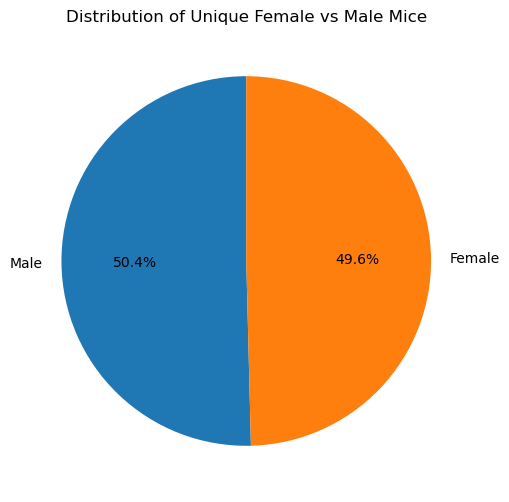

In [38]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filtering the data for the selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filtering the merged data for the selected regimens
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Looping through each treatment to calculate IQR and check for outliers
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_tumor_vol = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(regimen_tumor_vol)

    # Calculating the IQR
    quartiles = regimen_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Printing outliers information
    outliers = regimen_tumor_vol[(regimen_tumor_vol < lower_bound) | (regimen_tumor_vol > upper_bound)]
    print(f"{regimen} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


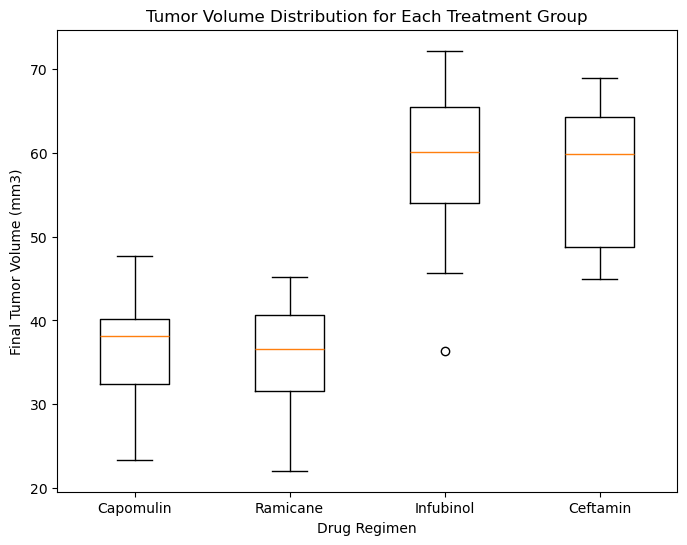

In [41]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Creating the box plot
plt.figure(figsize=(8,6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Adding plot labels and title
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

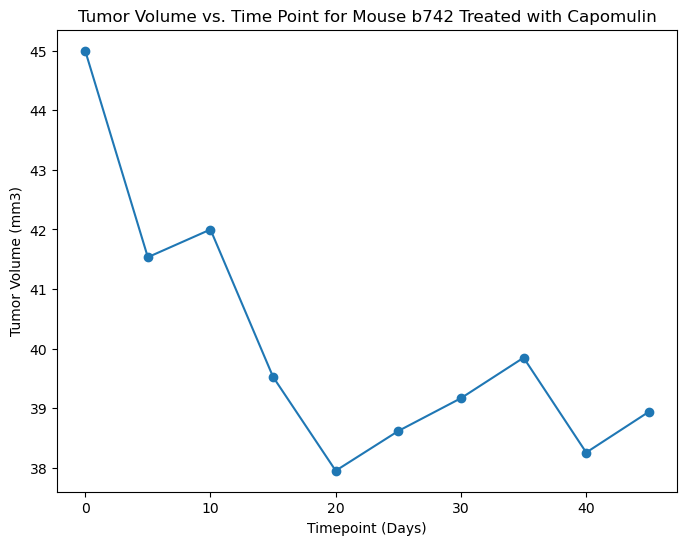

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 'b742')]

# Generating a line plot for tumor volume vs. timepoint
plt.figure(figsize=(8,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.title('Tumor Volume vs. Time Point for Mouse b742 Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

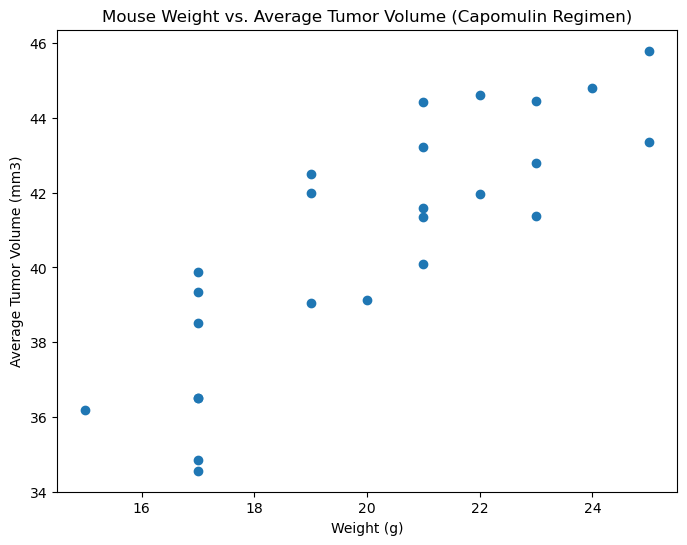

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Selecting only the numeric columns 'Tumor Volume (mm3)' and 'Weight (g)'
capomulin_data_numeric = capomulin_data[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]

# Calculating the average tumor volume per mouse
average_tumor_volume = capomulin_data_numeric.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data_numeric.groupby('Mouse ID')['Weight (g)'].mean()

# Generating a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8,6))
plt.scatter(mouse_weight, average_tumor_volume)

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

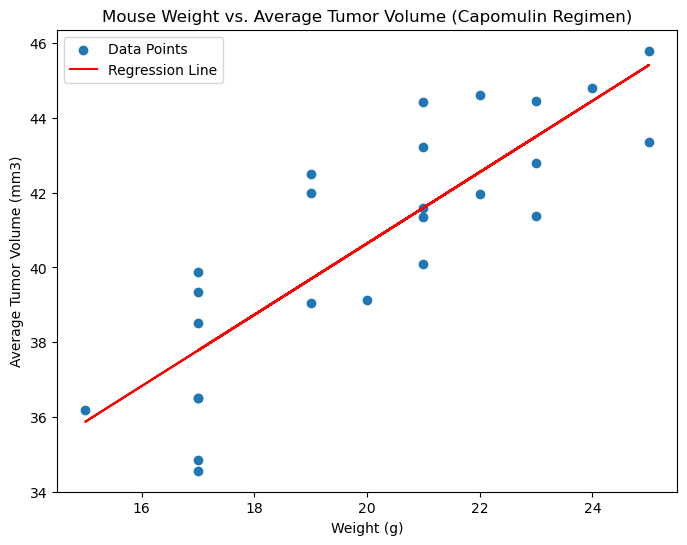

In [46]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Importing necessary functions for correlation and linear regression
from scipy.stats import linregress

# Calculating the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Displaying the results
correlation, slope, intercept, r_value, p_value, std_err

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(mouse_weight, average_tumor_volume, label='Data Points')

# Plotting the regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')

# Adding labels, title, and legend
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.show()